<a href="https://colab.research.google.com/github/CaioPalombo/fundamentos/blob/main/panda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importações

In [2]:
import json
import numpy as np
import pandas as pd
import plotly.express as px


## Acesso ao Google Drive

In [3]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [4]:
caminho_padrao = '/content/gdrive/MyDrive'
caminho_especifico = 'arquivos_ad'
caminho_completo = '/content/gdrive/MyDrive/arquivos_ad'

## Data Frame

In [5]:
dados = {
    "Nome" : ["Slash", "Trivia", "Telepata", "Olaf"],
    "Curso" : ["História", "Relações Internacionais", "Direito", "Serviço Social"],
    "Idade" : [23, 20, 24, 25],
    "Cor favorita" : [["Verde"], ["Vermelho"], ["Lilás"], ["Verde"]]
}

dados2 = {
    "Nome" : ["Refrão", "Aleatório", "Felino", "Samara"],
    "Curso" : ["História", "Relações Internacionais", "Serviço Social", "Serviço Social"],
    "Idade" : [18, 28, 26, 24],
    "Cor favorita" : [["Azul"], ["Bege"], ["Liás"], ["Verde"]]
}

df = pd.DataFrame(dados)
print(df)

       Nome                    Curso  Idade Cor favorita
0     Slash                 História     23      [Verde]
1    Trivia  Relações Internacionais     20   [Vermelho]
2  Telepata                  Direito     24      [Lilás]
3      Olaf           Serviço Social     25      [Verde]


In [6]:
df['Ano de Nascimento'] = 2025 - df['Idade'].astype(int) # (.astype(inir) é uma modificação. Coloquei as idades enre aspas da primeira vez)
print(df)

       Nome                    Curso  Idade Cor favorita  Ano de Nascimento
0     Slash                 História     23      [Verde]               2002
1    Trivia  Relações Internacionais     20   [Vermelho]               2005
2  Telepata                  Direito     24      [Lilás]               2001
3      Olaf           Serviço Social     25      [Verde]               2000


In [7]:
# "Nomes" Series

nomes = df["Nome"]
print(f"Series de Nomes Extraídos do DataFrame:\n {nomes}")

# Index das idades

idades_series = pd.Series([23, 20, 24, 25], index=nomes)
print(f"Series de Cursos com index personalizados:\n {idades_series}")

Series de Nomes Extraídos do DataFrame:
 0       Slash
1      Trivia
2    Telepata
3        Olaf
Name: Nome, dtype: object
Series de Cursos com index personalizados:
 Nome
Slash       23
Trivia      20
Telepata    24
Olaf        25
dtype: int64


## Arquivos do Data Frame

## Comparando DFs

In [8]:
df = pd.DataFrame(dados)
df2 = pd.DataFrame(dados2)

df.compare(df2)

Nome               Curso                 Idade       Cor favorita  \
       self      other     self           other  self other         self   
0     Slash     Refrão      NaN             NaN    23    18      [Verde]   
1    Trivia  Aleatório      NaN             NaN    20    28   [Vermelho]   
2  Telepata     Felino  Direito  Serviço Social    24    26      [Lilás]   
3      Olaf     Samara      NaN             NaN    25    24          NaN   

           
    other  
0  [Azul]  
1  [Bege]  
2  [Liás]  
3     NaN

In [9]:
# Contact (Juna colunas ou linhas ao DF)

mais_dados = {
    "Nome" : ["Bazinga", "Monize"],
    "Curso" : ["História", "Relações Internacionais"],
    "Idade" : [20, 22],
    "Cor favorita" : [["Preto"], ["Azul"]]
}

df_dados_novos = pd.DataFrame(mais_dados, index=[4, 5])
pd.concat([df, df_dados_novos])


,Nome,Curso,Idade,Cor favorita
0,Slash,História,23,[Verde]
1,Trivia,Relações Internacionais,20,[Vermelho]
2,Telepata,Direito,24,[Lilás]
3,Olaf,Serviço Social,25,[Verde]
4,Bazinga,História,20,[Preto]
5,Monize,Relações Internacionais,22,[Azul]


In [10]:
# Colunas novas

coluna_nova = {
    'Sexo': ['M', 'F', 'F', 'F']
}
df_coluna_nova = pd.DataFrame(coluna_nova)

series_cidades = pd.Series(["Limeira", "Porto Velho", "São João da BV", "Ribeirão Preto"], name="Cidade")
 #o parâmetro "name" define o rótulo da Series quando ela for para o DataFrame

pd.concat([df, df_coluna_nova, series_cidades], axis=1)

,Nome,Curso,Idade,Cor favorita,Sexo,Cidade
0,Slash,História,23,[Verde],M,Limeira
1,Trivia,Relações Internacionais,20,[Vermelho],F,Porto Velho
2,Telepata,Direito,24,[Lilás],F,São João da BV
3,Olaf,Serviço Social,25,[Verde],F,Ribeirão Preto


### Merged

In [11]:
df_hobbies = {
    "Pessoa" : ["Slash", "Trivia", "Telepata", "Olaf"],
    "Hobbies" : ["RPG", "Video Games", "Artesanato", "Academia"]
}

df_hobbies = pd.DataFrame(df_hobbies)


df_merged= pd.merge(df, df_hobbies, left_on='Nome', right_on='Pessoa', how='inner')
print(df_merged)

       Nome                    Curso  Idade Cor favorita    Pessoa  \
0     Slash                 História     23      [Verde]     Slash   
1    Trivia  Relações Internacionais     20   [Vermelho]    Trivia   
2  Telepata                  Direito     24      [Lilás]  Telepata   
3      Olaf           Serviço Social     25      [Verde]      Olaf   

       Hobbies  
0          RPG  
1  Video Games  
2   Artesanato  
3     Academia  


### Join

In [12]:
df_hobbies = {
    "Hobbies" : ["RPG", "Video Games", "Artesanato", "Academia"]
}

df_hobbies = pd.DataFrame(df_hobbies)


df.join(df_hobbies, how='inner')
#print(df.join)

,Nome,Curso,Idade,Cor favorita,Hobbies
0,Slash,História,23,[Verde],RPG
1,Trivia,Relações Internacionais,20,[Vermelho],Video Games
2,Telepata,Direito,24,[Lilás],Artesanato
3,Olaf,Serviço Social,25,[Verde],Academia


## Estatística

In [13]:
dados_ex = {
    'Nome': ['Marcos', 'Carlos', 'Fabiana', 'Lúcia'],
    'Profissão': ['Encanador', 'Mecânico', 'Diplomata', 'Designer'],
    'Idade': [55, 43, 31, 25],
    'Altura': [1.85, 1.78, 1.63, 1.67],
    'Cor Favorita': [['N/A'], ['Verde'], ['Azul','Vermelho'], ['Verde']]
}
df_ex = pd.DataFrame(dados)

#máximos e mínimos
max_idade = df['Idade'].max()
min_idade = df['Idade'].min()
print(f'A maior idade é: {max_idade}')
print(f'A menor idade é: {min_idade}')

#calculando a média de altura
media_altura = df['Altura'].mean()
print(f'A média de altura é: {media_altura}\n')

#calculando a mediana de altura
mediana_altura = df['Altura'].median()
print(f'A mediana de altura é: {mediana_altura}\n')

#moda das cores favoritas
moda_cores = df['Cor Favorita'].mode()
print(f'A moda das cores favoritas é: {moda_cores}\n')

A maior idade é: 25
A menor idade é: 20


KeyError: 'Altura'

## DF Describe

In [ ]:
dados_ex = {
    'Nome': ['Marcos', 'Carlos', 'Fabiana', 'Lúcia'],
    'Profissão': ['Encanador', 'Mecânico', 'Diplomata', 'Designer'],
    'Idade': [55, 43, 31, 25],
    'Altura': [1.85, 1.78, 1.63, 1.67],
    'Cor Favorita': [['N/A'], ['Verde'], ['Azul','Vermelho'], ['Verde']],
    'Sexo': ['M', 'M', 'F', 'F']
}
df_ex = pd.DataFrame(dados)
df.describe()

## Agrupando

In [ ]:
div_sexo = df.groupby("Sexo")

idade_sexo = df.groupby("Sexo")["Idade"].mean()
print(f"Média de idade por sexo {idade_sexo}\n")

## Graficos

In [ ]:
# Cartas de magic vendidas

cartas_vendidas = {
    "Cores" : ["Branco", "Azul", "Preto","Vermelho", "Verde", "Incolor", "Multicolor"],
    "Quantidade" : [179, 210, 233, 307, 274, 79, 81],
    "Ano" : [2023, 2023, 2023, 2023, 2023, 2023, 2023],
    "Vendas" : [895, 1050, 1165, 1535, 1370, 395, 405],
    "Lucro" : [220, 260, 290, 380, 340, 95, 100]
}
df_cartas = pd.DataFrame(cartas_vendidas)

df_produto = df_cartas.groupby("Cores")["Quantidade"].sum().reset_index()
fig_bar = px.bar(df_produto, x="Cores", y="Quantidade", title="Quantidade de Cartas Vendidas por Cor")
fig_bar.show()

In [ ]:
df_ts = pd.DataFrame(cartas_vendidas)
fig_line2 = px.line(df_ts, x="Vendas", y="Ano", title="Vendas de Cartas ao Longo do Tempo")
fig_line2.show()

## Funções Personalizadas


In [ ]:
dados = {
    'Produto': ['Laranja', 'Morango', 'Jaca', 'Esponja', 'Leite'],
    'Preco_Unitario': [1.50, 6.00, 5.00, 3.25, 6.00],
    'Quantidade_Vendida': [30, 25, 8, 5, 28],
    'Categoria': ['Fruta', 'Fruta', 'Vegetal', 'Limpeza', 'Mercearia']
}
df = pd.DataFrame(dados)

#Função Anônima (lamda)
df['Classific_Vendas'] = df['Quantidade_Vendida'].apply(lambda vendas: 'Vendeu Pouco' if vendas < 10 else 'Vendeu Muito')

#Função Definida (def)
def comestivel(categoria):
  if categoria == 'Fruta' or categoria == 'Vegetal':
    return 'Sim'
  else:
    return 'Não'

df['Comestivel'] = df['Categoria'].apply(comestivel)

#Cálculo entre colunas (usando **axis=1**)
def calcular_total_venda(linha):
    return linha['Preco_Unitario'] * linha['Quantidade_Vendida']

df['Valor_Total_Venda'] = df.apply(calcular_total_venda, axis=1)

df.head()

## Análise de dados

In [14]:
import os

caminho_pasta =  f'{caminho_completo}/json'
lista_dfs = []

for arquivo in os.listdir(caminho_pasta): #lê cada arquivo da pasta e o transforma de json para data frame
    caminho_completo_arquivo = os.path.join(caminho_pasta, arquivo)
    try:
        df = pd.read_json(caminho_completo_arquivo)
        if '_default' in df.columns:
            df = pd.json_normalize(df['_default'])
        lista_dfs.append(df) #junta os novos dfs em uma lista
        print(f'Arquivo lido com sucesso: {arquivo}')

    except Exception as e:
        print(f'Erro ao ler o arquivo {arquivo}: {e}')

df_sica = pd.concat(lista_dfs, ignore_index=True) #transforma todos os dfs da lista em um dataframe só
df_sica.head()


Arquivo lido com sucesso: BD_IR_LATAM_SICA-2002-02.json
Arquivo lido com sucesso: BD_IR_LATAM_SICA-2003-09.json
Arquivo lido com sucesso: BD_IR_LATAM_SICA-2001-10.json
Arquivo lido com sucesso: BD_IR_LATAM_SICA-2003-08.json
Arquivo lido com sucesso: BD_IR_LATAM_SICA-2003-07.json
Arquivo lido com sucesso: BD_IR_LATAM_SICA-2003-06.json
Arquivo lido com sucesso: BD_IR_LATAM_SICA-2002-04.json
Arquivo lido com sucesso: BD_IR_LATAM_SICA-2003-10.json
Arquivo lido com sucesso: BD_IR_LATAM_SICA-2003-02.json
Arquivo lido com sucesso: BD_IR_LATAM_SICA-2001-08.json
Arquivo lido com sucesso: BD_IR_LATAM_SICA-2002-06.json
Arquivo lido com sucesso: BD_IR_LATAM_SICA-2001-12.json
Arquivo lido com sucesso: BD_IR_LATAM_SICA-2002-08.json
Arquivo lido com sucesso: BD_IR_LATAM_SICA-2004-01.json
Arquivo lido com sucesso: BD_IR_LATAM_SICA-2001-07.json
Arquivo lido com sucesso: BD_IR_LATAM_SICA-2025-05.json
Arquivo lido com sucesso: BD_IR_LATAM_SICA-2001-09.json
Arquivo lido com sucesso: BD_IR_LATAM_SICA-2003-

,tipo_dado,pais,origem,sigla,classificado,categoria,autoria,titulo,subtitulo,data,...,nome_arquivo,dir_arquivo,dir_base,codigo_bd,dir_bd,nome_arq_bd,env_dir_bd,extra_01,extra_02,extra_03
0,[aberto],[El Salvador],[Sistema da Integração Centroamericana],BD_IR_LATAM_SICA,[noticias institucionais],NA,[CCAD],I Encuentro Mesoamericano sobre Derecho y Polí...,NA,27/02/2002,...,NA,NA,[/hdvm12],bd/005/001/007,[/json/],BD_IR_LATAM_SICA-2002-02,BD_IR_LATAM_SICA,NA,NA,NA
1,[aberto],[El Salvador],[Sistema da Integração Centroamericana],BD_IR_LATAM_SICA,[noticias institucionais],NA,[CCAD],Reunión Regional para Prevenir y Mitigar efect...,NA,19/02/2002,...,NA,NA,[/hdvm12],bd/005/001/007,[/json/],BD_IR_LATAM_SICA-2002-02,BD_IR_LATAM_SICA,NA,NA,NA
2,[aberto],[El Salvador],[Sistema da Integração Centroamericana],BD_IR_LATAM_SICA,[noticias institucionais],NA,[CCAD],CCAD participa en Reunión de Países Megadivers...,NA,18/02/2002,...,NA,NA,[/hdvm12],bd/005/001/007,[/json/],BD_IR_LATAM_SICA-2002-02,BD_IR_LATAM_SICA,NA,NA,NA
3,[aberto],[El Salvador],[Sistema da Integração Centroamericana],BD_IR_LATAM_SICA,[noticias institucionais],NA,[CCAD],II Módulo de Maestría en Derecho Ambiental y D...,NA,13/02/2002,...,NA,NA,[/hdvm12],bd/005/001/007,[/json/],BD_IR_LATAM_SICA-2002-02,BD_IR_LATAM_SICA,NA,NA,NA
4,[aberto],[El Salvador],[Sistema da Integração Centroamericana],BD_IR_LATAM_SICA,[noticias institucionais],NA,[CCAD],Reunión del Consejo Centroamericano de Bosques...,NA,10/02/2002,...,NA,NA,[/hdvm12],bd/005/001/007,[/json/],BD_IR_LATAM_SICA-2002-02,BD_IR_LATAM_SICA,NA,NA,NA


## Visualização de DF

In [ ]:
# Quantidade de entradas, colunas e o tipo de cada dado
df_sica.info()

In [19]:
# Nome das colunas
df_sica.columns

Index(['tipo_dado', 'pais', 'origem', 'sigla', 'classificado', 'categoria',
       'autoria', 'titulo', 'subtitulo', 'data', 'horario', 'datatime',
       'data_atualizado', 'horario_atualizado', 'link', 'link_archive',
       'data_archive', 'horario_archive', 'local', 'tags', 'paragrafos',
       'imagens', 'nome_arquivo', 'dir_arquivo', 'dir_base', 'codigo_bd',
       'dir_bd', 'nome_arq_bd', 'env_dir_bd', 'extra_01', 'extra_02',
       'extra_03'],
      dtype='object')

In [18]:
# Comamndo para mostrar o número de linhas e colunas
df_sica.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24217 entries, 0 to 24216
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tipo_dado           24217 non-null  object
 1   pais                24217 non-null  object
 2   origem              24217 non-null  object
 3   sigla               24217 non-null  object
 4   classificado        24217 non-null  object
 5   categoria           24217 non-null  object
 6   autoria             24217 non-null  object
 7   titulo              24217 non-null  object
 8   subtitulo           24217 non-null  object
 9   data                24217 non-null  object
 10  horario             24217 non-null  object
 11  datatime            24217 non-null  object
 12  data_atualizado     24217 non-null  object
 13  horario_atualizado  24217 non-null  object
 14  link                24217 non-null  object
 15  link_archive        24217 non-null  object
 16  data_archive        24

In [20]:
# Exibe as linhas indicadas entre os parentes. Se não tiver nenhum parâmetro, será exibido apenas as primeiras 5 linhas.

df_sica.head(15)

,tipo_dado,pais,origem,sigla,classificado,categoria,autoria,titulo,subtitulo,data,...,nome_arquivo,dir_arquivo,dir_base,codigo_bd,dir_bd,nome_arq_bd,env_dir_bd,extra_01,extra_02,extra_03
0,[aberto],[El Salvador],[Sistema da Integração Centroamericana],BD_IR_LATAM_SICA,[noticias institucionais],NA,[CCAD],I Encuentro Mesoamericano sobre Derecho y Polí...,NA,27/02/2002,...,NA,NA,[/hdvm12],bd/005/001/007,[/json/],BD_IR_LATAM_SICA-2002-02,BD_IR_LATAM_SICA,NA,NA,NA
1,[aberto],[El Salvador],[Sistema da Integração Centroamericana],BD_IR_LATAM_SICA,[noticias institucionais],NA,[CCAD],Reunión Regional para Prevenir y Mitigar efect...,NA,19/02/2002,...,NA,NA,[/hdvm12],bd/005/001/007,[/json/],BD_IR_LATAM_SICA-2002-02,BD_IR_LATAM_SICA,NA,NA,NA
2,[aberto],[El Salvador],[Sistema da Integração Centroamericana],BD_IR_LATAM_SICA,[noticias institucionais],NA,[CCAD],CCAD participa en Reunión de Países Megadivers...,NA,18/02/2002,...,NA,NA,[/hdvm12],bd/005/001/007,[/json/],BD_IR_LATAM_SICA-2002-02,BD_IR_LATAM_SICA,NA,NA,NA
3,[aberto],[El Salvador],[Sistema da Integração Centroamericana],BD_IR_LATAM_SICA,[noticias institucionais],NA,[CCAD],II Módulo de Maestría en Derecho Ambiental y D...,NA,13/02/2002,...,NA,NA,[/hdvm12],bd/005/001/007,[/json/],BD_IR_LATAM_SICA-2002-02,BD_IR_LATAM_SICA,NA,NA,NA
4,[aberto],[El Salvador],[Sistema da Integração Centroamericana],BD_IR_LATAM_SICA,[noticias institucionais],NA,[CCAD],Reunión del Consejo Centroamericano de Bosques...,NA,10/02/2002,...,NA,NA,[/hdvm12],bd/005/001/007,[/json/],BD_IR_LATAM_SICA-2002-02,BD_IR_LATAM_SICA,NA,NA,NA
5,[aberto],[El Salvador],[Sistema da Integração Centroamericana],BD_IR_LATAM_SICA,[noticias institucionais],NA,[CCAD],Primer Congreso Empresarial CA y México de Imp...,NA,08/02/2002,...,NA,NA,[/hdvm12],bd/005/001/007,[/json/],BD_IR_LATAM_SICA-2002-02,BD_IR_LATAM_SICA,NA,NA,NA
6,[aberto],[El Salvador],[Sistema da Integração Centroamericana],BD_IR_LATAM_SICA,[noticias institucionais],NA,[CCAD],Avanza creación de Red Universitaria de Derech...,NA,01/02/2002,...,NA,NA,[/hdvm12],bd/005/001/007,[/json/],BD_IR_LATAM_SICA-2002-02,BD_IR_LATAM_SICA,NA,NA,NA
7,[aberto],[El Salvador],[Sistema da Integração Centroamericana],BD_IR_LATAM_SICA,[noticias institucionais],NA,[CCAD],Presentan Estudio sobre situación y Perspectiv...,NA,01/02/2002,...,NA,NA,[/hdvm12],bd/005/001/007,[/json/],BD_IR_LATAM_SICA-2002-02,BD_IR_LATAM_SICA,NA,NA,NA
8,[aberto],[El Salvador],[Sistema da Integração Centroamericana],BD_IR_LATAM_SICA,[noticias institucionais],NA,[CCAD],Publicarán Libro sobre Comercio y Servicios Am...,NA,01/02/2002,...,NA,NA,[/hdvm12],bd/005/001/007,[/json/],BD_IR_LATAM_SICA-2002-02,BD_IR_LATAM_SICA,NA,NA,NA
9,[aberto],[El Salvador],[Sistema da Integração Centroamericana],BD_IR_LATAM_SICA,[noticias institucionais],NA,[OCCEFS],Inauguración de la delegación en la ciudad de ...,NA,30/09/2003,...,NA,NA,[/hdvm12],bd/005/001/007,[/json/],BD_IR_LATAM_SICA-2003-09,BD_IR_LATAM_SICA,NA,NA,NA


In [21]:
# É praticamente igual ao anterior, mas mostra as últimas linhas.

df_sica.tail(10)

,tipo_dado,pais,origem,sigla,classificado,categoria,autoria,titulo,subtitulo,data,...,nome_arquivo,dir_arquivo,dir_base,codigo_bd,dir_bd,nome_arq_bd,env_dir_bd,extra_01,extra_02,extra_03
24207,[aberto],[El Salvador],[Sistema da Integração Centroamericana],BD_IR_LATAM_SICA,[noticias institucionais],NA,[CCAD],Presidencia Pro Témpore CCAD en inauguración d...,NA,07/09/2021,...,NA,NA,[/hdvm12],bd/005/001/007,[/json/],BD_IR_LATAM_SICA-2021-09,BD_IR_LATAM_SICA,NA,NA,NA
24208,[aberto],[El Salvador],[Sistema da Integração Centroamericana],BD_IR_LATAM_SICA,[noticias institucionais],NA,[CCAD],Proyecto MAR2R/CCAD inicia participación en Su...,NA,06/09/2021,...,NA,NA,[/hdvm12],bd/005/001/007,[/json/],BD_IR_LATAM_SICA-2021-09,BD_IR_LATAM_SICA,NA,NA,NA
24209,[aberto],[El Salvador],[Sistema da Integração Centroamericana],BD_IR_LATAM_SICA,[noticias institucionais],NA,[MAR2R],Proyecto MAR2R/CCAD inició participación en Su...,NA,06/09/2021,...,NA,NA,[/hdvm12],bd/005/001/007,[/json/],BD_IR_LATAM_SICA-2021-09,BD_IR_LATAM_SICA,NA,NA,NA
24210,[aberto],[El Salvador],[Sistema da Integração Centroamericana],BD_IR_LATAM_SICA,[noticias institucionais],NA,[CCAD],Secretario Ejecutivo CCAD se reúne con Asesor ...,NA,03/09/2021,...,NA,NA,[/hdvm12],bd/005/001/007,[/json/],BD_IR_LATAM_SICA-2021-09,BD_IR_LATAM_SICA,NA,NA,NA
24211,[aberto],[El Salvador],[Sistema da Integração Centroamericana],BD_IR_LATAM_SICA,[noticias institucionais],NA,[CCAD],Inicia proceso para posición regional CCAD en ...,NA,03/09/2021,...,NA,NA,[/hdvm12],bd/005/001/007,[/json/],BD_IR_LATAM_SICA-2021-09,BD_IR_LATAM_SICA,NA,NA,NA
24212,[aberto],[El Salvador],[Sistema da Integração Centroamericana],BD_IR_LATAM_SICA,[noticias institucionais],NA,[COMISCA],SE-COMISCA realiza Taller de formación de entr...,NA,03/09/2021,...,NA,NA,[/hdvm12],bd/005/001/007,[/json/],BD_IR_LATAM_SICA-2021-09,BD_IR_LATAM_SICA,NA,NA,NA
24213,[aberto],[El Salvador],[Sistema da Integração Centroamericana],BD_IR_LATAM_SICA,[noticias institucionais],NA,[COMISCA],SE-COMISCA pone a disposición Términos de Refe...,NA,03/09/2021,...,NA,NA,[/hdvm12],bd/005/001/007,[/json/],BD_IR_LATAM_SICA-2021-09,BD_IR_LATAM_SICA,NA,NA,NA
24214,[aberto],[El Salvador],[Sistema da Integração Centroamericana],BD_IR_LATAM_SICA,[noticias institucionais],NA,[CENTROESTAD],Desarrollo de conferencia sobre la trascendenc...,NA,03/09/2021,...,NA,NA,[/hdvm12],bd/005/001/007,[/json/],BD_IR_LATAM_SICA-2021-09,BD_IR_LATAM_SICA,NA,NA,NA
24215,[aberto],[El Salvador],[Sistema da Integração Centroamericana],BD_IR_LATAM_SICA,[noticias institucionais],NA,[COMISCA],SE-COMISCA y MCR se reúnen para fortalecer tra...,NA,02/09/2021,...,NA,NA,[/hdvm12],bd/005/001/007,[/json/],BD_IR_LATAM_SICA-2021-09,BD_IR_LATAM_SICA,NA,NA,NA
24216,[aberto],[El Salvador],[Sistema da Integração Centroamericana],BD_IR_LATAM_SICA,[noticias institucionais],NA,[COMISCA],SE-COMISCA apuesta por la vigilancia centinela...,NA,01/09/2021,...,NA,NA,[/hdvm12],bd/005/001/007,[/json/],BD_IR_LATAM_SICA-2021-09,BD_IR_LATAM_SICA,NA,NA,NA


In [22]:
# Contagem de quantas vezes uma resposta se repete na coluna
print("Autores:")
value_counts_autoria = df_sica['autoria'].value_counts()
print(value_counts_autoria)

Autores:
autoria
[SG-SICA]        4654
[II]             2416
[OSPESCA]        1885
[CCAD]           1688
[COMISCA]        1554
                 ... 
[INPESCA]           1
[CCVAH]             1
[4E-G]              1
[4E-REG]            1
[Cancillería]       1
Name: count, Length: 87, dtype: int64


## Padronização e limpeza de dados

### Dados Ausentes

In [23]:
df_sica.isna().sum()
#o comando '.isna()' identifica dados ausentes, enquanto o comando '.sum()' soma quantas vezes aparecem em cada colunas

,0
tipo_dado,0
pais,0
origem,0
sigla,0
classificado,0
categoria,0
autoria,0
titulo,0
subtitulo,0
data,0


In [24]:
# conta valores ausentes em apenas uma coluna
df_sica['autoria'].isna().sum()

np.int64(0)

In [28]:
#preenche dados ausentes de uma coluna com o que estiver escrito entre parênteses
df_sica['nome_arquivo'].fillna('na')

,nome_arquivo
0,NA
1,NA
2,NA
3,NA
4,NA
...,...
24212,NA
24213,NA
24214,NA
24215,NA


In [30]:
#remove linhas com todos os valores ausentes
df_sica = df_sica.dropna(how='all')

In [31]:
#remove linhas com qualquer valor ausente
df_sica = df_sica.dropna()

## Remoção de dados duplicadas

Há dois comandos para isso, um deles exclui todas e mantém a primeira e o outro mantém a última. São repectivamente os seguintes:
```
df_sica = df.drop_duplicates(keep='first')
df_sica = df.drop_duplicates(keep='last')

In [33]:
#remove linhas que têm o mesmo link
df_sica = df_sica.drop_duplicates(subset=['link'], keep='last')

## Formatação de texto




### Funções básicas

In [35]:
df_sica['sigla'] = df_sica['sigla'].str.lower() #converte todo o texto para letras minúsculas.
# df_sica['sigla'] = df_sica['sigla'].str.upper() #converte todo o texto para letras maiúsculas.
df_sica['sigla'] = df_sica['sigla'].str.strip() #remove espaços em branco do início e fim.

df_sica.head()

,tipo_dado,pais,origem,sigla,classificado,categoria,autoria,titulo,subtitulo,data,...,nome_arquivo,dir_arquivo,dir_base,codigo_bd,dir_bd,nome_arq_bd,env_dir_bd,extra_01,extra_02,extra_03
0,[aberto],[El Salvador],[Sistema da Integração Centroamericana],bd_ir_latam_sica,[noticias institucionais],NA,[CCAD],I Encuentro Mesoamericano sobre Derecho y Polí...,NA,27/02/2002,...,NA,NA,[/hdvm12],bd/005/001/007,[/json/],BD_IR_LATAM_SICA-2002-02,BD_IR_LATAM_SICA,NA,NA,NA
1,[aberto],[El Salvador],[Sistema da Integração Centroamericana],bd_ir_latam_sica,[noticias institucionais],NA,[CCAD],Reunión Regional para Prevenir y Mitigar efect...,NA,19/02/2002,...,NA,NA,[/hdvm12],bd/005/001/007,[/json/],BD_IR_LATAM_SICA-2002-02,BD_IR_LATAM_SICA,NA,NA,NA
2,[aberto],[El Salvador],[Sistema da Integração Centroamericana],bd_ir_latam_sica,[noticias institucionais],NA,[CCAD],CCAD participa en Reunión de Países Megadivers...,NA,18/02/2002,...,NA,NA,[/hdvm12],bd/005/001/007,[/json/],BD_IR_LATAM_SICA-2002-02,BD_IR_LATAM_SICA,NA,NA,NA
3,[aberto],[El Salvador],[Sistema da Integração Centroamericana],bd_ir_latam_sica,[noticias institucionais],NA,[CCAD],II Módulo de Maestría en Derecho Ambiental y D...,NA,13/02/2002,...,NA,NA,[/hdvm12],bd/005/001/007,[/json/],BD_IR_LATAM_SICA-2002-02,BD_IR_LATAM_SICA,NA,NA,NA
4,[aberto],[El Salvador],[Sistema da Integração Centroamericana],bd_ir_latam_sica,[noticias institucionais],NA,[CCAD],Reunión del Consejo Centroamericano de Bosques...,NA,10/02/2002,...,NA,NA,[/hdvm12],bd/005/001/007,[/json/],BD_IR_LATAM_SICA-2002-02,BD_IR_LATAM_SICA,NA,NA,NA


### Junção da lista de parágrafos em uma única string

In [36]:
def processar_paragrafos(paragrafo):
  texto_completo = ' '.join(paragrafo) # concatena todos os parágrafos da lista em uma única string
  return texto_completo

df_sica['paragrafos02'] = df_sica['paragrafos'].apply(processar_paragrafos)
#o comando 'apply()' aplica a função 'processar_paragrafos()' na coluna do dataframe

df_sica['paragrafos02']

,paragrafos02
0,Con el propósito de actualizar actores regiona...
1,"De acuerdo a los pronósticos ambientales, Cent..."
2,El Secretario ejecutivo de la CCAD participó d...
3,"Del 3 al 13 de Febrero se impartió en Managua,..."
4,El encuentro incluyó una video conferencia en ...
...,...
24212,La Secretaría Ejecutiva del COMISCA con apoyo ...
24213,La Secretaría Ejecutiva del Consejo de Ministr...
24214,En el marco de las conmemoraciones por el Bice...
24215,"Este 2 de septiembre de 2021, la Secretaria Ej..."


## Remoção de Stop Words

In [37]:
import nltk #Biblioteca de processamento de linguagem natual, de onde serão importadas as Stop Words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string


# Baixar stopwords do nltk e punkt_tab
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab') # Download the missing resource

# Stopwords em português
stop_words = set(stopwords.words('portuguese'))

def normalizar_texto(texto):
    texto = texto.lower() #coloca o texto em letras minúsculas
    texto = texto.translate(str.maketrans('', '', string.punctuation)) #remove a pontuação
    palavras = word_tokenize(texto) # tokenizar (dividir em palavras)
    palavras = [palavra for palavra in palavras if palavra not in stop_words and len(palavra) > 1]  #remover stopwords e palavras com menos de 2 caracteres
    return palavras

df_sica['tokens'] = df_sica['paragrafos02'].apply(normalizar_texto)

df_sica['tokens']

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,tokens
0,"[con, el, propósito, actualizar, actores, regi..."
1,"[acuerdo, los, pronósticos, ambientales, centr..."
2,"[el, secretario, ejecutivo, la, ccad, particip..."
3,"[del, al, 13, febrero, impartió, en, managua, ..."
4,"[el, encuentro, incluyó, una, video, conferenc..."
...,...
24212,"[la, secretaría, ejecutiva, del, comisca, con,..."
24213,"[la, secretaría, ejecutiva, del, consejo, mini..."
24214,"[en, el, marco, las, conmemoraciones, el, bice..."
24215,"[septiembre, 2021, la, secretaria, ejecutiva, ..."


## Análise

In [38]:
#noticia por ano

df_sica['data']= pd.to_datetime(df_sica['data'], format='%d/%m/%Y')
df_sica['ano']= pd.to_datetime(df_sica['data']).dt.year
noticias_por_ano= df_sica['ano'].value_counts().sort_index()
noticias_por_ano= noticias_por_ano.to_frame()
noticias_por_ano

,count
ano,
2001,24
2002,68
2003,53
2004,143
2005,710
2006,588
2007,1180
2008,1746
2009,1933


In [39]:
grafico_noticias_por_ano = px.bar(noticias_por_ano)
grafico_noticias_por_ano

## Quantas notícias têm determinada palavra no título?

In [40]:
palavra_chave = input('Escreva uma palavra chave: ')
noticias = df_sica[df_sica['titulo'].str.contains(palavra_chave,case=False,na=False)]
noticias

Escreva uma palavra chave: Brasil


,tipo_dado,pais,origem,sigla,classificado,categoria,autoria,titulo,subtitulo,data,...,codigo_bd,dir_bd,nome_arq_bd,env_dir_bd,extra_01,extra_02,extra_03,paragrafos02,tokens,ano
863,[aberto],[El Salvador],[Sistema da Integração Centroamericana],bd_ir_latam_sica,[noticias institucionais],NA,[SG-SICA],Brasil y C.A. buscan más alternativas al petróleo,NA,2005-08-15,...,bd/005/001/007,[/json/],BD_IR_LATAM_SICA-2005-08,BD_IR_LATAM_SICA,NA,NA,NA,El Salvador conocerá hoy la experiencia brasil...,"[el, salvador, conocerá, hoy, la, experiencia,...",2005
2053,[aberto],[El Salvador],[Sistema da Integração Centroamericana],bd_ir_latam_sica,[noticias institucionais],NA,[CCAD],Taller ambiental de la Asociación para Combust...,NA,2006-03-20,...,bd/005/001/007,[/json/],BD_IR_LATAM_SICA-2006-03,BD_IR_LATAM_SICA,NA,NA,NA,Bajo la iniciativa de la Asociación para Combu...,"[bajo, la, iniciativa, la, asociación, combust...",2006
2083,[aberto],[El Salvador],[Sistema da Integração Centroamericana],bd_ir_latam_sica,[noticias institucionais],NA,[CCT],III Congreso Mundial de Enfrentamiento de la E...,NA,2008-11-28,...,bd/005/001/007,[/json/],BD_IR_LATAM_SICA-2008-11,BD_IR_LATAM_SICA,NA,NA,NA,"Del 25 al 28 de noviembre del corriente año, e...","[del, 25, al, 28, noviembre, del, corriente, a...",2008
3379,[aberto],[El Salvador],[Sistema da Integração Centroamericana],bd_ir_latam_sica,[noticias institucionais],NA,[SG-SICA],Brasil será observador en el SICA,NA,2008-10-08,...,bd/005/001/007,[/json/],BD_IR_LATAM_SICA-2008-10,BD_IR_LATAM_SICA,NA,NA,NA,"El pasado 7 de octubre, en Río de Janeiro, se ...","[el, pasado, octubre, en, río, janeiro, suscri...",2008
3389,[aberto],[El Salvador],[Sistema da Integração Centroamericana],bd_ir_latam_sica,[noticias institucionais],NA,[SG-SICA],Brasil se incorpora al SICA y anuncia mayor co...,NA,2008-10-07,...,bd/005/001/007,[/json/],BD_IR_LATAM_SICA-2008-10,BD_IR_LATAM_SICA,NA,NA,NA,"Agencia EFE. Río de Janeiro, octubre 7, 2008 ...","[agencia, efe, río, janeiro, octubre, 2008, br...",2008
3390,[aberto],[El Salvador],[Sistema da Integração Centroamericana],bd_ir_latam_sica,[noticias institucionais],NA,[SG-SICA],Brasil y Centroamérica estrechan vínculos y pl...,NA,2008-10-07,...,bd/005/001/007,[/json/],BD_IR_LATAM_SICA-2008-10,BD_IR_LATAM_SICA,NA,NA,NA,soitu.es/ Actualidad EFE Actualizado 07-10-20...,"[soitues, actualidad, efe, actualizado, 071020...",2008
3392,[aberto],[El Salvador],[Sistema da Integração Centroamericana],bd_ir_latam_sica,[noticias institucionais],NA,[SG-SICA],Suscriben Admisión de la República Federativa ...,NA,2008-10-07,...,bd/005/001/007,[/json/],BD_IR_LATAM_SICA-2008-10,BD_IR_LATAM_SICA,NA,NA,NA,"Este día 7 de octubre, en Río de Janeiro, se s...","[día, octubre, en, río, janeiro, suscribió, el...",2008
3394,[aberto],[El Salvador],[Sistema da Integração Centroamericana],bd_ir_latam_sica,[noticias institucionais],NA,[SG-SICA],Brasil firma alianza con países centroamericanos,NA,2008-10-07,...,bd/005/001/007,[/json/],BD_IR_LATAM_SICA-2008-10,BD_IR_LATAM_SICA,NA,NA,NA,Associated Press RIO DE JANEIRO - Brasil se in...,"[associated, press, rio, janeiro, brasil, inco...",2008
3398,[aberto],[El Salvador],[Sistema da Integração Centroamericana],bd_ir_latam_sica,[noticias institucionais],NA,[SG-SICA],Brasil se incorporará mañana al SICA como obse...,NA,2008-10-06,...,bd/005/001/007,[/json/],BD_IR_LATAM_SICA-2008-10,BD_IR_LATAM_SICA,NA,NA,NA,Brasil se incorporará mañana al Sistema de la ...,"[brasil, incorporará, mañana, al, sistema, la,...",2008
3411,[aberto],[El Salvador],[Sistema da Integração Centroamericana],bd_ir_latam_sica,[noticias institucionais],NA,[SG-SICA],Brasil se incorporará la próxima semana al SIC...,NA,2008-10-03,...,bd/005/001/007,[/json/],BD_IR_LATAM_SICA-2008-10,BD_IR_LATAM_SICA,NA,NA,NA,TEGUCIGALPA.- Brasil se incorporará la próxima...,"[tegucigalpa, brasil, incorporará, la, próxima...",2008


In [41]:
palavra_chave_ano = noticias['titulo'].groupby(noticias['data'].dt.year).count()
quantidade = palavra_chave_ano.values.tolist()
anos_int = palavra_chave_ano.index.tolist()
anos = [str(ano) for ano in anos_int]
print(quantidade,anos)

[3, 2, 1, 10, 2, 4, 3, 4, 2, 1, 2, 2, 1, 1, 1] ['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2017', '2018', '2019', '2024']


In [42]:
grafico_palavra_chave = px.bar(x=anos,y=quantidade,labels={
    'x':'Anos',
    'y':f'Qtd. de citações da palavra-chave ({palavra_chave})'
})
grafico_palavra_chave


## Palavras mais frequentes nas notícias

In [43]:
from collections import Counter

lista_termos = ['Argentina','Uruguai','Paraguai', 'Trump', 'Deus', 'família', 'pátria']


def contar_palavras(texto, lista_termos):
    # Concatenar todos os parágrafos da lista em uma única string
    paragrafos = ' '.join(texto)

    contador = Counter()
    for palavra in lista_termos:
        contador[palavra] = paragrafos.lower().count(palavra.lower())
    return contador

# Aplicar a função à coluna 'paragrafos' e somar as ocorrências
frequencias_totais = Counter()
for paragrafo in df_sica['paragrafos']:
    frequencias_totais += contar_palavras(paragrafo, lista_termos)


frequencias_totais

Counter({'Argentina': 632, 'Deus': 39, 'Trump': 18})

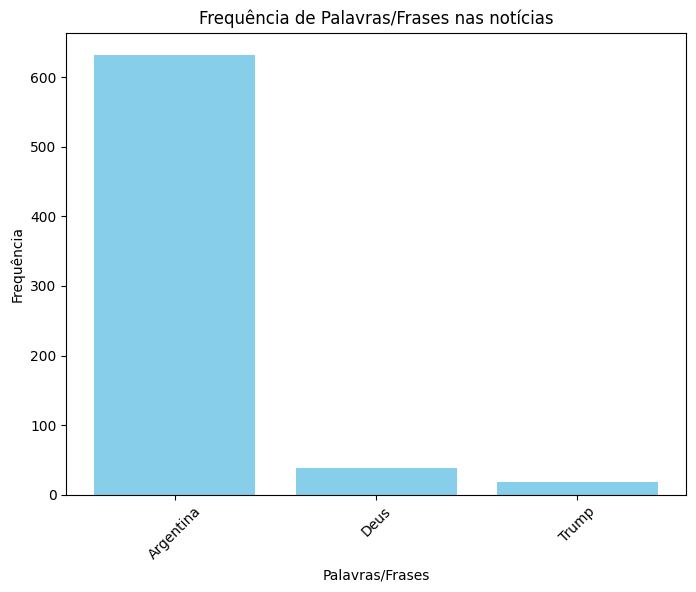

In [44]:
import matplotlib.pyplot as plt

# Criar um gráfico de barras com as frequências
plt.figure(figsize=(8, 6))
plt.bar(frequencias_totais.keys(), frequencias_totais.values(), color='skyblue')
plt.xlabel('Palavras/Frases')
plt.ylabel('Frequência')
plt.title('Frequência de Palavras/Frases nas notícias')
plt.xticks(rotation=45)  # Rotacionar os rótulos para melhorar a legibilidade
plt.show()